In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE

In [5]:
#Importing Dataset
main_df=pd.read_csv('C:\\Users\\gifty\\Downloads\\Data-Collisions.csv')

C:\Users\gifty\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
#Converting Severity Code from (1/2) tp (0/1)
severity_code = main_df['SEVERITYCODE'].values

In [7]:
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)


In [8]:
main_df ["SEVERITYCODE"] = severity_code


In [9]:
#Descriptive Stats
descriptive_stats= main_df.describe(include="all")

    #Plotting counts of selected variables
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

C:\Users\gifty\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


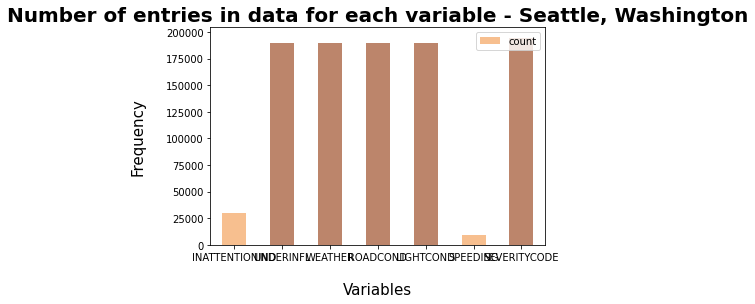

In [10]:
color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

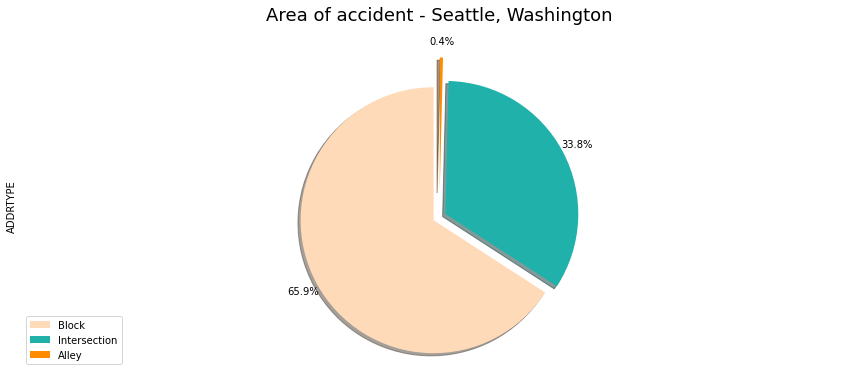

In [11]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=main_df['ADDRTYPE'].value_counts()

addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)


plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()

In [12]:
#Check IncKey unqiue numbers
main_df['INCKEY'].nunique()

#Encoding in attention (0 = No, 1 = Yes)
main_df["INATTENTIONIND"].replace("Y", 1, inplace=True)
main_df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
main_df["UNDERINFL"].replace("N", 0, inplace=True)
main_df["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
main_df["SPEEDING"].replace("Y", 1, inplace=True)
main_df["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
main_df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
main_df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
main_df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
main_df["WEATHER"].replace("Clear", 0, inplace=True)
main_df["WEATHER"].replace("Raining", 3, inplace=True)
main_df["WEATHER"].replace("Overcast", 1, inplace=True)
main_df["WEATHER"].replace("Other", "Unknown", inplace=True)
main_df["WEATHER"].replace("Snowing", 3, inplace=True)
main_df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
main_df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
main_df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
main_df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
main_df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
main_df["ROADCOND"].replace("Dry", 0, inplace=True)
main_df["ROADCOND"].replace("Wet", 2, inplace=True)
main_df["ROADCOND"].replace("Ice", 2, inplace=True)
main_df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
main_df["ROADCOND"].replace("Other", "Unknown", inplace=True)
main_df["ROADCOND"].replace("Standing Water", 2, inplace=True)
main_df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
main_df["ROADCOND"].replace("Oil", 2, inplace=True)


#Making new dataframe with only variables and unique keys
selected_columns=main_df[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

np.count_nonzero(feature_df['UNDERINFL'])

    #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

    #Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

    #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

    #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)



In [13]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [14]:
# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

#Make reduced df from feature_df to get a few random points to make map
limit = 100005
reduced_df = feature_df.iloc [0:limit:5, 0:]

#Folium Map
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)


C:\Users\gifty\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")


True

In [16]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

        #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))


Accuracy score for Decision Tree =  0.5760076740692476


In [17]:
 #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))

Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          24461  13984  38445
1           9442   7364  16806
All        33903  21348  55251
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     33903
           1       0.44      0.34      0.39     21348

    accuracy                           0.58     55251
   macro avg       0.54      0.53      0.53     55251
weighted avg       0.56      0.58      0.56     55251



In [20]:
     #COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools


Confusion matrix, without normalization
[[ 7364  9442]
 [13984 24461]]


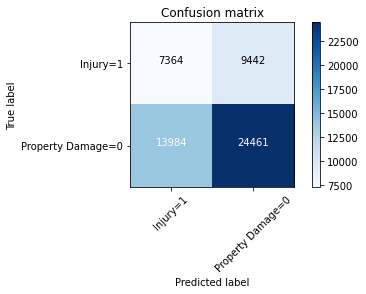

In [22]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
     
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')


0.6888226756788528
Accuracy 0.5888219217751715
              precision    recall  f1-score   support

           0       0.72      0.67      0.69     38445
           1       0.35      0.41      0.38     16806

    accuracy                           0.59     55251
   macro avg       0.53      0.54      0.53     55251
weighted avg       0.61      0.59      0.60     55251

Confusion matrix, without normalization
[[ 6846  9960]
 [12758 25687]]


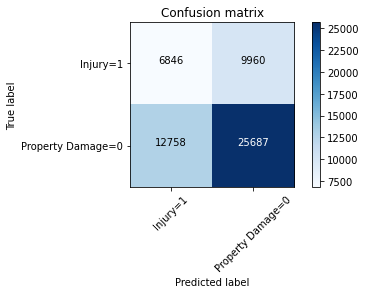

In [23]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')